In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import dcor
import seaborn as sns

In [29]:
wimbledon = pd.read_csv("./Wimbledon_featured_matches.csv")
wimbledon.head()

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:00,1,1,1,0,0,0,...,0,0,0,6.000,7.840,2,95.0,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:38,1,1,2,0,0,0,...,0,0,0,5.253,7.094,1,118.0,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:01,1,1,3,0,0,0,...,0,0,0,13.800,19.808,4,120.0,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:31,1,1,4,0,0,0,...,0,0,0,51.108,75.631,13,130.0,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:02:21,1,1,5,0,0,0,...,0,0,0,0.649,0.813,1,112.0,W,NCTL,NaN


In [30]:
wimbledon.describe()

,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,p2_games,server,serve_no,point_victor,...,p1_break_pt,p2_break_pt,p1_break_pt_won,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph
count,7284.000000,7284.000000,7284.000000,7284.000000,7284.000000,7284.000000,7284.000000,7284.000000,7284.000000,7284.000000,...,7284.000000,7284.000000,7284.000000,7284.000000,7284.000000,7284.00000,7284.000000,7284.000000,7284.000000,6532.000000
mean,2.470346,5.912548,125.873970,0.770181,0.700165,2.496842,2.415706,1.510297,1.360653,1.489566,...,0.038029,0.031164,0.013866,0.010434,0.024163,0.02073,14.002311,13.869239,3.128913,112.409675
std,1.194327,3.413538,80.290207,0.807190,0.728310,1.850032,1.811191,0.499928,0.480223,0.499925,...,0.191278,0.173773,0.116943,0.101619,0.153564,0.14249,13.492861,13.607645,3.192182,12.858116
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,72.000000
25%,1.000000,3.000000,59.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4.986750,4.901750,1.000000,103.000000
50%,2.000000,6.000000,118.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,9.970000,9.782000,2.000000,115.000000
75%,3.000000,8.000000,182.000000,1.000000,1.000000,4.000000,4.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,18.928500,18.420500,4.000000,123.000000
max,5.000000,13.000000,337.000000,2.000000,2.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,148.723000,156.856000,34.000000,141.000000


In [31]:
wimbledon['elapsed_time_td'] = pd.to_timedelta(wimbledon['elapsed_time'])
wimbledon['time_diff'] = wimbledon.groupby('match_id')['elapsed_time_td'].diff().dt.total_seconds()
wimbledon['time_diff'] = wimbledon.groupby('match_id')['time_diff'].fillna(
    wimbledon['elapsed_time_td'].dt.total_seconds()
)
wimbledon.loc[299: 304, ['match_id', 'elapsed_time', 'time_diff']]

,match_id,elapsed_time,time_diff
299,2023-wimbledon-1301,03:56:11,37.0
300,2023-wimbledon-1302,00:00:00,0.0
301,2023-wimbledon-1302,00:00:36,36.0
302,2023-wimbledon-1302,00:00:58,22.0
303,2023-wimbledon-1302,00:01:52,54.0
304,2023-wimbledon-1302,00:02:32,40.0


In [32]:
def select_variables(match_data, indicator, index, if_diff):
    grouped_data = match_data.groupby(['match_id', 'set_no', 'game_no'])[indicator].apply(lambda x: x.values.tolist()).reset_index(name=index)
    points_won_lists = grouped_data[index].tolist()
    if if_diff:
        points_won_lists = [[p1 - p2 for p1, p2 in match] for match in points_won_lists]
    return points_won_lists

In [33]:
def show_variables(ylabel, points_won_lists):
    np.random.seed(42)
    selected_indices = np.random.choice(len(points_won_lists), size=3, replace=False)
    selected_matches_diffs = [points_won_lists[i] for i in selected_indices]
    plt.figure(figsize=(12, 6))
    for i, match_diffs in enumerate(selected_matches_diffs, start=1):
        plt.subplot(1, 3, i)
        plt.plot(match_diffs, marker='o', linestyle='-', label=f'Match {selected_indices[i-1]}')
        plt.xlabel('Point Sequence')
        plt.ylabel(ylabel)
        plt.title(f'Match {selected_indices[i-1]} Point Difference')
        plt.axhline(y=0, color='grey', linestyle='--')
        plt.legend()
    plt.tight_layout()
    plt.show()

In [34]:
data = pd.DataFrame()

[[-1, 0, -1, 0, 1, 0, 1, 0, 1, 2], [1, 2, 3, 2, 1, 2, 1, 0], [1, 2, 1, 2, 3], [2, 1, 0, -1], [0, 1, 2, 1, 0, -1, 0, 1]]


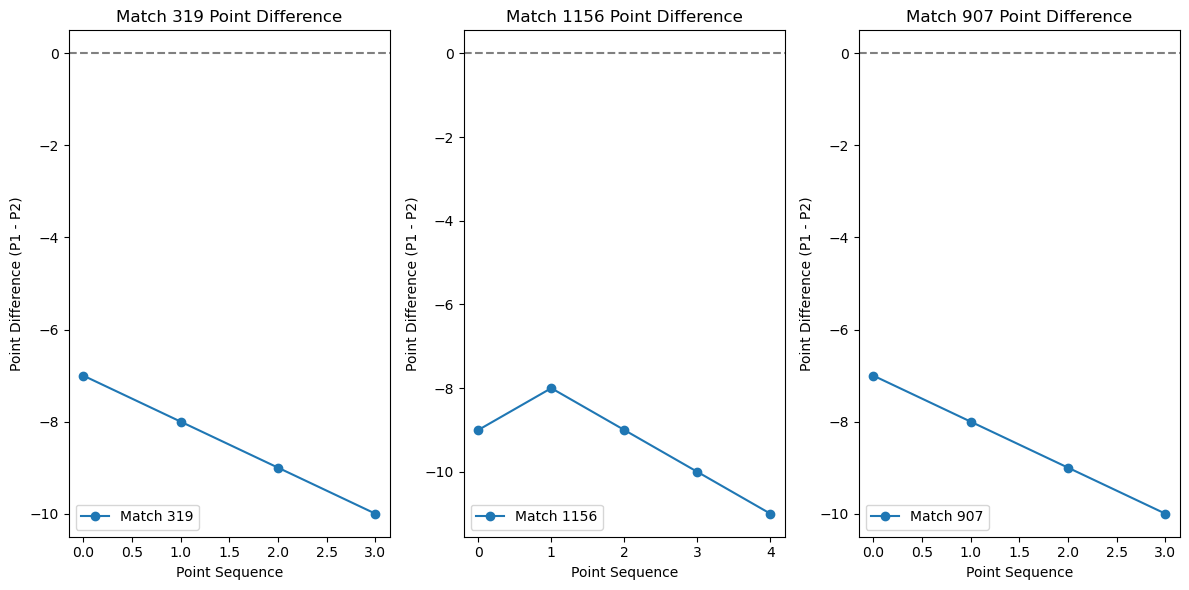

,points_won_list
0,-1
1,0
2,-1
3,0
4,1
...,...
7279,0
7280,1
7281,0
7282,1


In [35]:
points_won_lists = select_variables(wimbledon, ['p1_points_won', 'p2_points_won'], 'points_won_list', True)
print(points_won_lists[:5])
show_variables('Point Difference (P1 - P2)', points_won_lists)
points_won_lists = [element for sublist in points_won_lists for element in sublist]
data['points_won_list'] = points_won_lists
data

[[[0, 0], [0, 0], [0, 0], [0, 0], [1, 0], [0, 0], [1, 0], [0, 0], [0, 0], [0, 0]], [[0, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]], [[1, 0], [0, 0], [0, 0], [0, 0], [0, 0]], [[0, 0], [0, 0], [0, 1], [0, 0]], [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]]


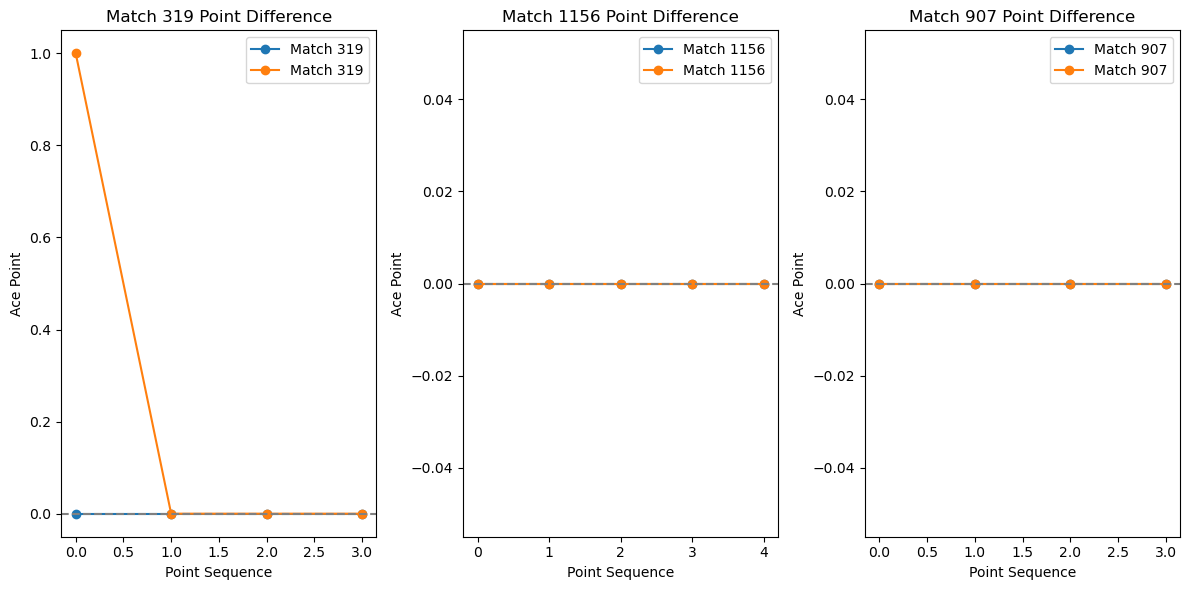

In [36]:
points_won_lists = select_variables(wimbledon, ['p1_ace', 'p2_ace'], 'ace_list', False)
print(points_won_lists[:5])
show_variables('Ace Point', points_won_lists)

[[0, 0, 0, 0, 1, 0, 1, 0, 0, 0], [-1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, -1, 0], [0, 0, 0, 0, 0, 0, 0, 0]]


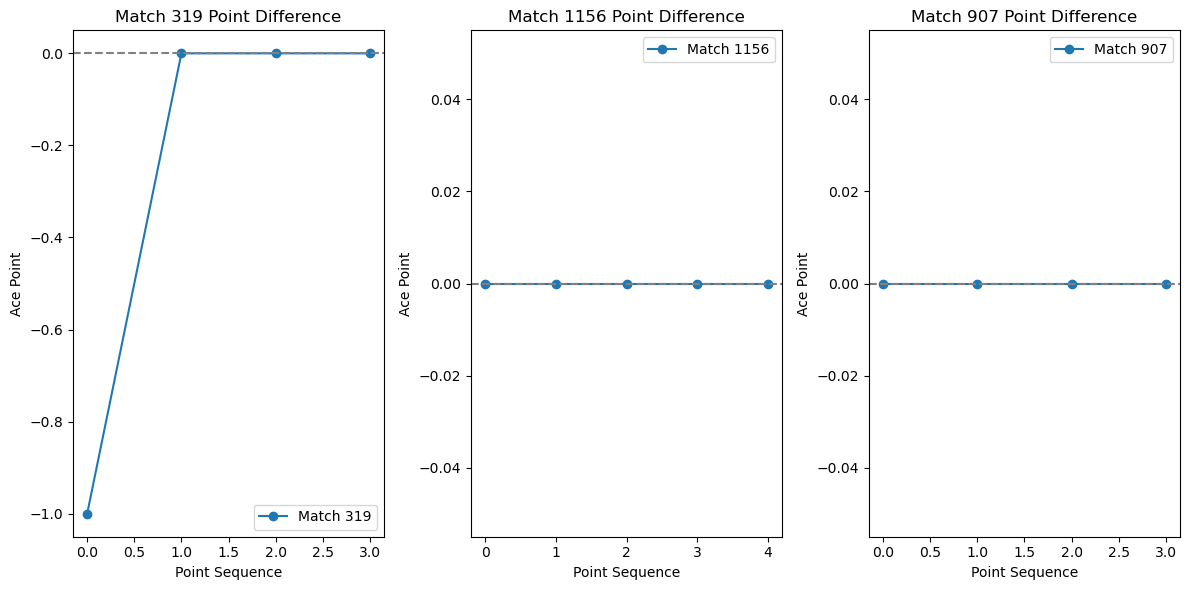

,points_won_list,ace_list
0,-1,0
1,0,0
2,-1,0
3,0,0
4,1,1
...,...,...
7279,0,0
7280,1,0
7281,0,0
7282,1,0


In [37]:
points_won_lists = select_variables(wimbledon, ['p1_ace', 'p2_ace'], 'ace_list', True)
print(points_won_lists[:5])
show_variables('Ace Point', points_won_lists)
points_won_lists = [element for sublist in points_won_lists for element in sublist]
data['ace_list'] = points_won_lists
data

[[[0, 0], [0, 0], [0, 0], [1, 0], [1, 0], [0, 0], [1, 0], [0, 1], [0, 0], [0, 0]], [[0, 1], [0, 0], [0, 0], [0, 1], [0, 0], [0, 0], [0, 0], [0, 1]], [[1, 0], [0, 0], [0, 0], [0, 0], [0, 0]], [[0, 0], [0, 0], [0, 1], [0, 1]], [[1, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]]


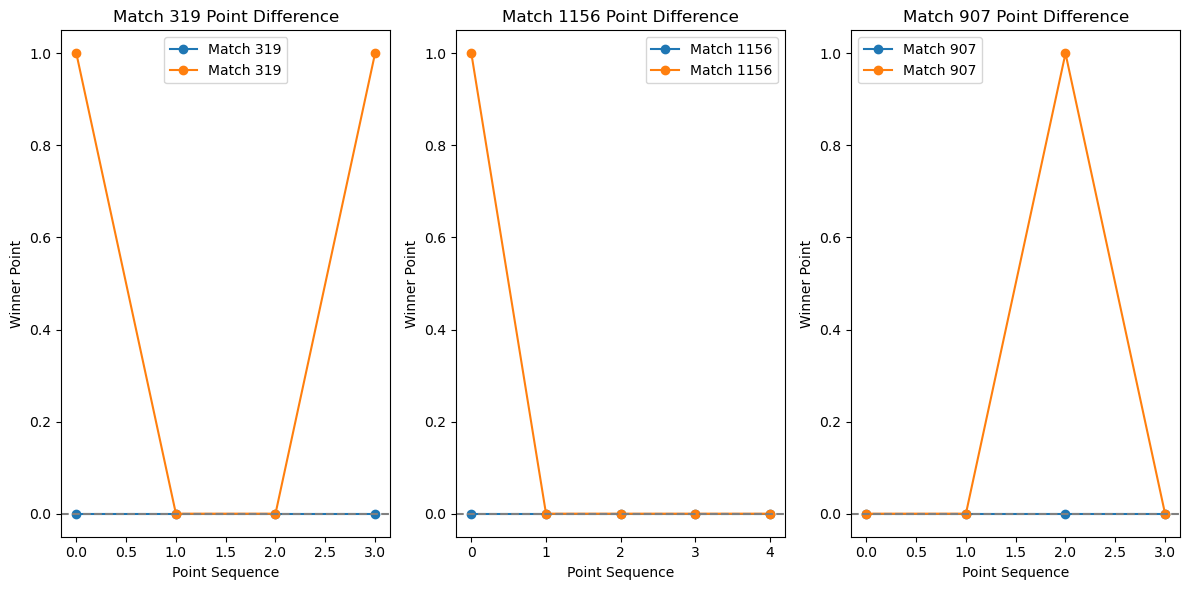

In [38]:
points_won_lists = select_variables(wimbledon, ['p1_winner', 'p2_winner'], 'winner_list', False)
print(points_won_lists[:5])
show_variables('Winner Point', points_won_lists)

[[0, 0, 0, 1, 1, 0, 1, -1, 0, 0], [-1, 0, 0, -1, 0, 0, 0, -1], [1, 0, 0, 0, 0], [0, 0, -1, -1], [1, 0, 0, 0, 0, 0, 0, 0]]


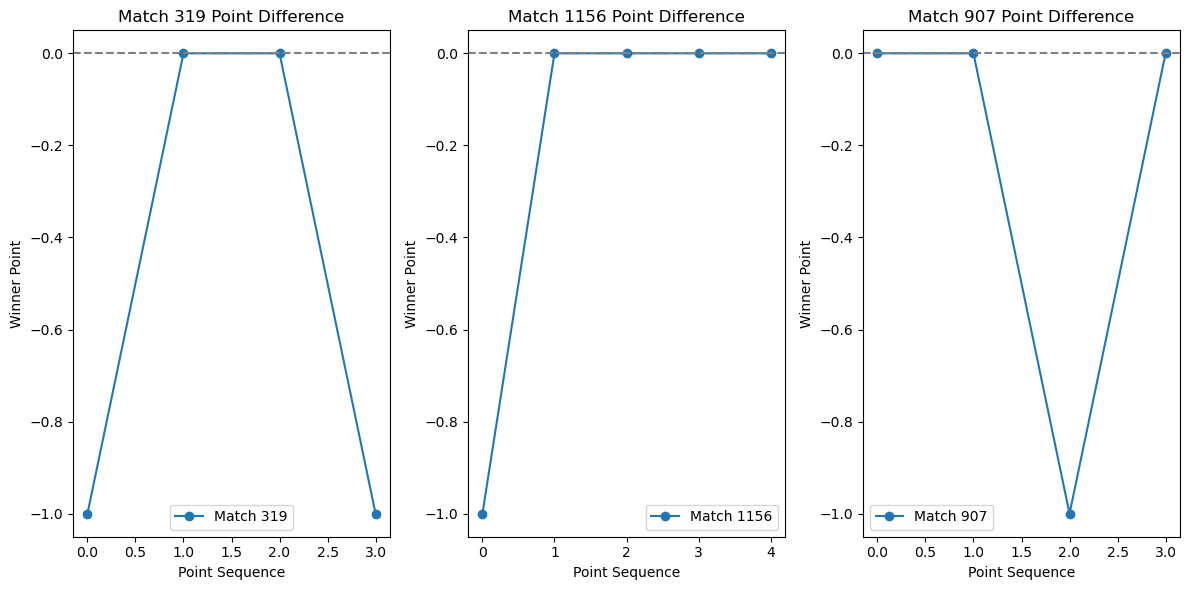

,points_won_list,ace_list,winner_list
0,-1,0,0
1,0,0,0
2,-1,0,0
3,0,0,1
4,1,1,1
...,...,...,...
7279,0,0,1
7280,1,0,1
7281,0,0,-1
7282,1,0,0


In [39]:
points_won_lists = select_variables(wimbledon, ['p1_winner', 'p2_winner'], 'winner_list', True)
print(points_won_lists[:5])
show_variables('Winner Point', points_won_lists)
points_won_lists = [element for sublist in points_won_lists for element in sublist]
data['winner_list'] = points_won_lists
data

[[0.0, 38.0, 23.0, 30.0, 50.0, 29.0, 43.0, 28.0, 47.0, 44.0], [93.0, 23.0, 38.0, 35.0, 30.0, 26.0, 43.0, 25.0], [39.0, 23.0, 30.0, 27.0, 42.0], [125.0, 44.0, 32.0, 21.0], [41.0, 36.0, 25.0, 30.0, 43.0, 52.0, 32.0, 52.0]]


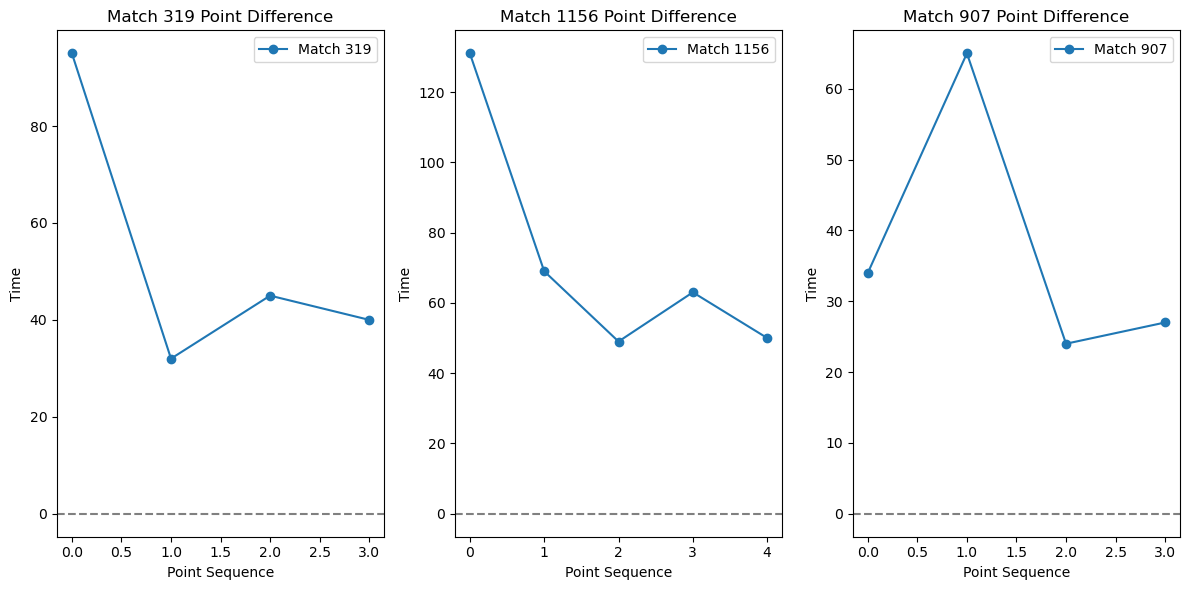

,points_won_list,ace_list,winner_list,time_diff_list
0,-1,0,0,0.0
1,0,0,0,38.0
2,-1,0,0,23.0
3,0,0,1,30.0
4,1,1,1,50.0
...,...,...,...,...
7279,0,0,1,27.0
7280,1,0,1,45.0
7281,0,0,-1,37.0
7282,1,0,0,32.0


In [40]:
points_won_lists = select_variables(wimbledon, 'time_diff', 'time_diff_list', False)
print(points_won_lists[:5])
show_variables('Time', points_won_lists)
points_won_lists = [element for sublist in points_won_lists for element in sublist]
data['time_diff_list'] = points_won_lists
data

[[[1, 0], [0, 0], [1, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]], [[0, 0], [0, 0], [0, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]], [[0, 0], [0, 0], [0, 0], [0, 1], [0, 0]], [[1, 0], [0, 0], [0, 0], [0, 0]], [[0, 0], [0, 0], [0, 0], [1, 0], [0, 0], [1, 0], [0, 0], [0, 0]]]


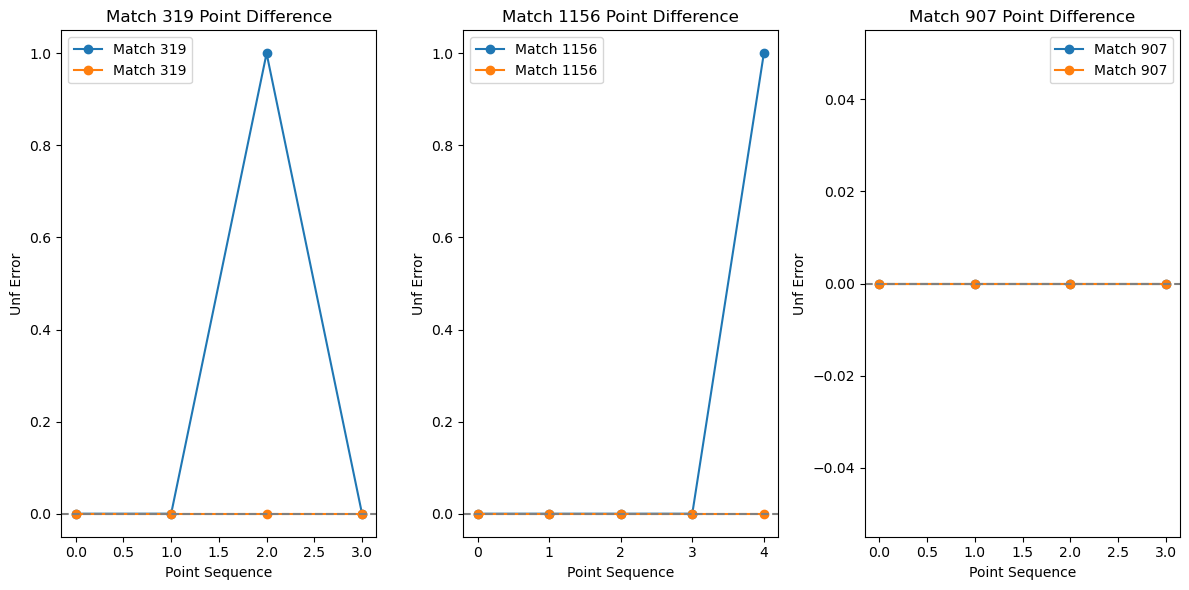

In [41]:
points_won_lists = select_variables(wimbledon, ['p1_unf_err','p2_unf_err'], 'unf_err_list', False)
print(points_won_lists[:5])
show_variables('Unf Error', points_won_lists)

[[1, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, -1, 0, 0, 0, 0, 0], [0, 0, 0, -1, 0], [1, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0]]


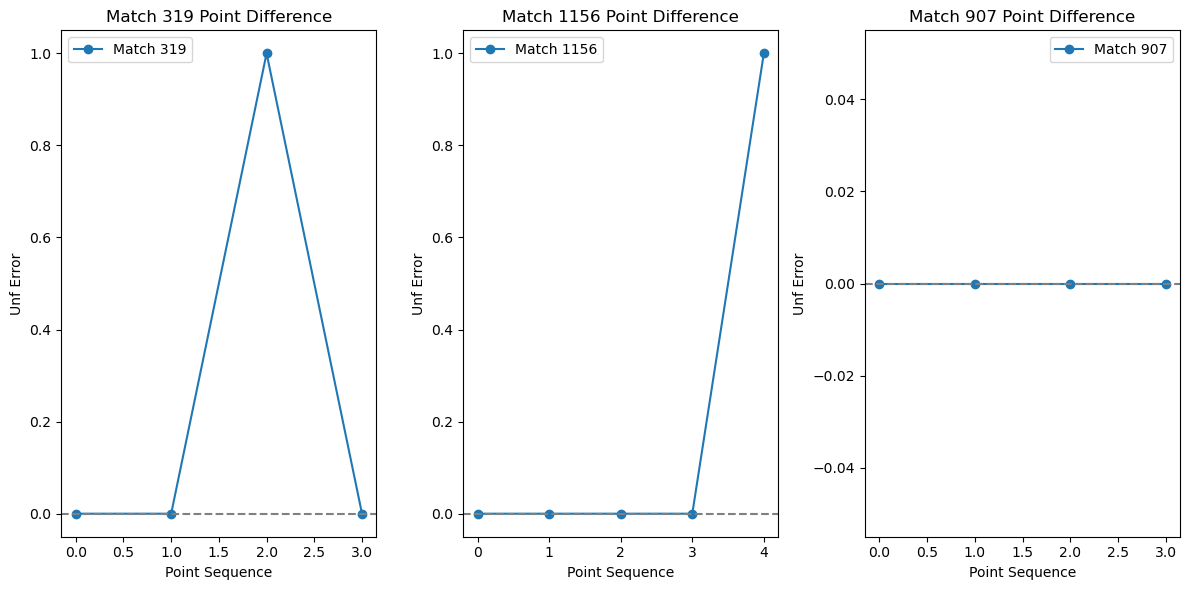

,points_won_list,ace_list,winner_list,time_diff_list,unf_err_list
0,-1,0,0,0.0,1
1,0,0,0,38.0,0
2,-1,0,0,23.0,1
3,0,0,1,30.0,0
4,1,1,1,50.0,0
...,...,...,...,...,...
7279,0,0,1,27.0,0
7280,1,0,1,45.0,0
7281,0,0,-1,37.0,0
7282,1,0,0,32.0,0


In [42]:
points_won_lists = select_variables(wimbledon, ['p1_unf_err','p2_unf_err'], 'unf_err_list', True)
print(points_won_lists[:5])
show_variables('Unf Error', points_won_lists)
points_won_lists = [element for sublist in points_won_lists for element in sublist]
data['unf_err_list'] = points_won_lists
data

[[2, 1, 2, 1, 1, 2, 1, 2, 1, 1], [2, 1, 1, 2, 2, 1, 2, 2], [1, 1, 2, 1, 1], [2, 2, 2, 2], [1, 1, 1, 2, 2, 2, 1, 1]]


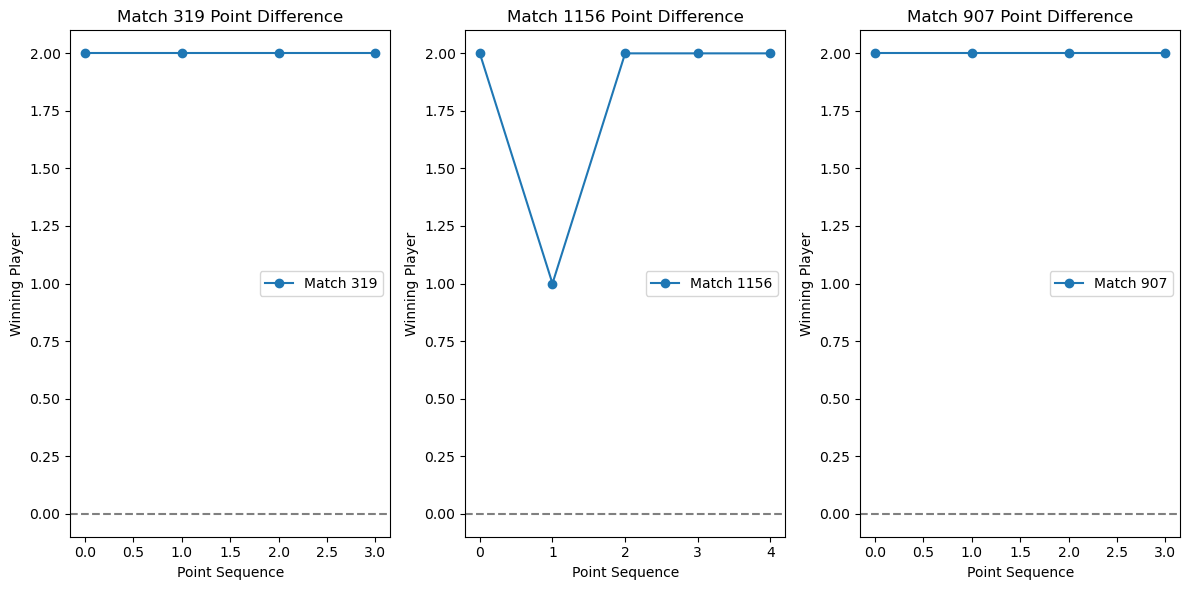

In [43]:
points_won_lists = select_variables(wimbledon, 'point_victor', 'victor_list', False)
print(points_won_lists[:5])
show_variables('Winning Player', points_won_lists)

[[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]], [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]], [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]], [[0, 0], [0, 0], [0, 0], [0, 0]], [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]]


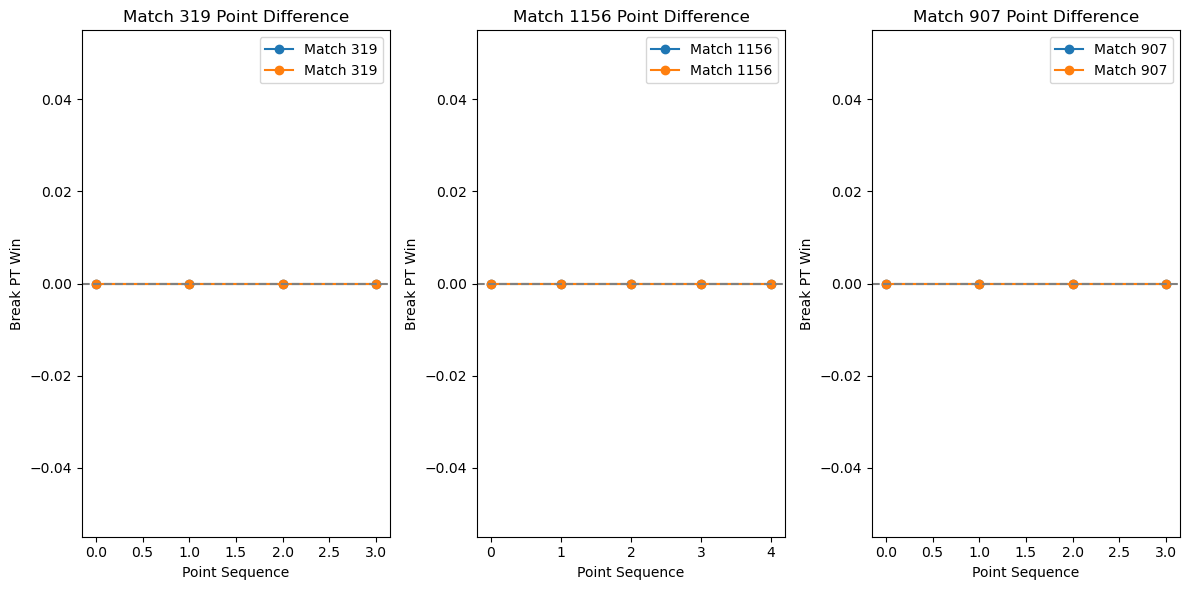

In [44]:
points_won_lists = select_variables(wimbledon, ['p1_break_pt_won','p2_break_pt_won'], 'break_pt_win_list', False)
print(points_won_lists[:5])
show_variables('Break PT Win', points_won_lists)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]


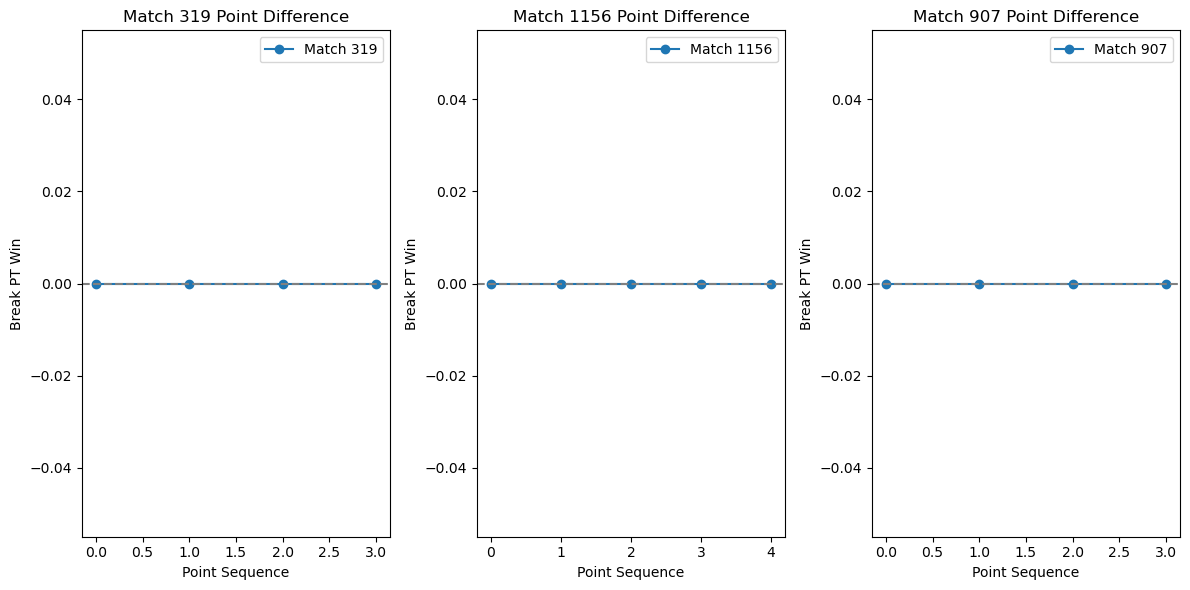

,points_won_list,ace_list,winner_list,time_diff_list,unf_err_list,break_pt_win_list
0,-1,0,0,0.0,1,0
1,0,0,0,38.0,0,0
2,-1,0,0,23.0,1,0
3,0,0,1,30.0,0,0
4,1,1,1,50.0,0,0
...,...,...,...,...,...,...
7279,0,0,1,27.0,0,0
7280,1,0,1,45.0,0,0
7281,0,0,-1,37.0,0,0
7282,1,0,0,32.0,0,0


In [45]:
points_won_lists = select_variables(wimbledon, ['p1_break_pt_won','p2_break_pt_won'], 'break_pt_win_list', True)
print(points_won_lists[:5])
show_variables('Break PT Win', points_won_lists)
points_won_lists = [element for sublist in points_won_lists for element in sublist]
data['break_pt_win_list'] = points_won_lists
data

[[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 1], [1, 0], [0, 0]], [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 1]], [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]], [[0, 0], [0, 0], [0, 0], [0, 0]], [[0, 0], [0, 0], [1, 0], [0, 0], [0, 0], [0, 0], [1, 0], [1, 0]]]


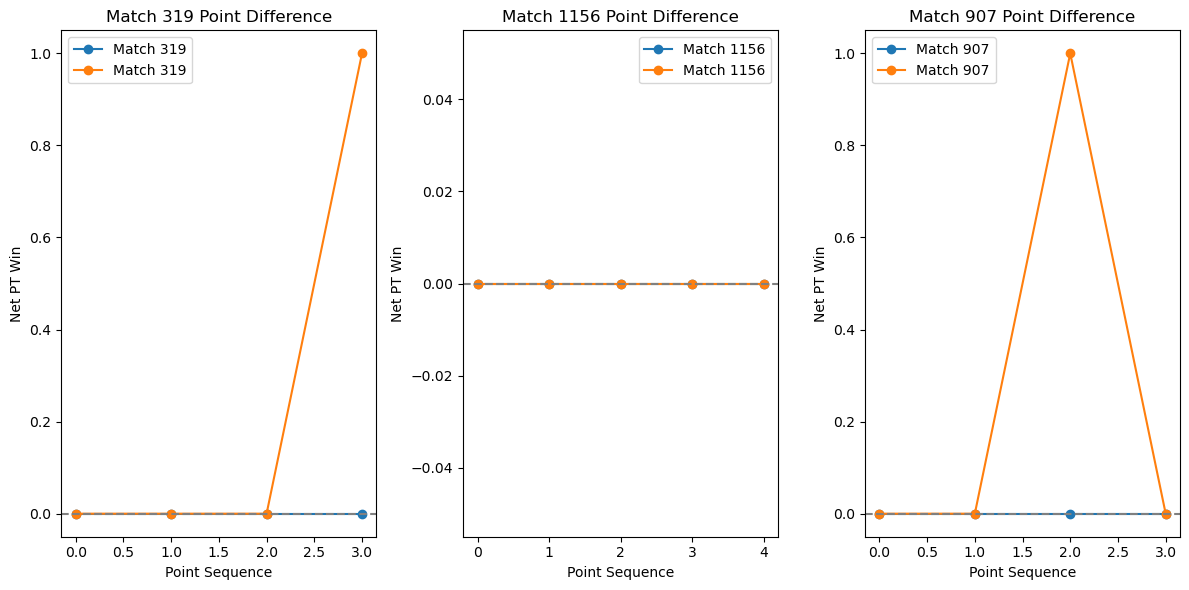

In [46]:
points_won_lists = select_variables(wimbledon, ['p1_net_pt_won','p2_net_pt_won'], 'net_pt_won_list', False)
print(points_won_lists[:5])
show_variables('Net PT Win', points_won_lists)

[[0, 0, 0, 0, 0, 0, 0, -1, 1, 0], [0, 0, 0, 0, 0, 0, 0, -1], [0, 0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 1]]


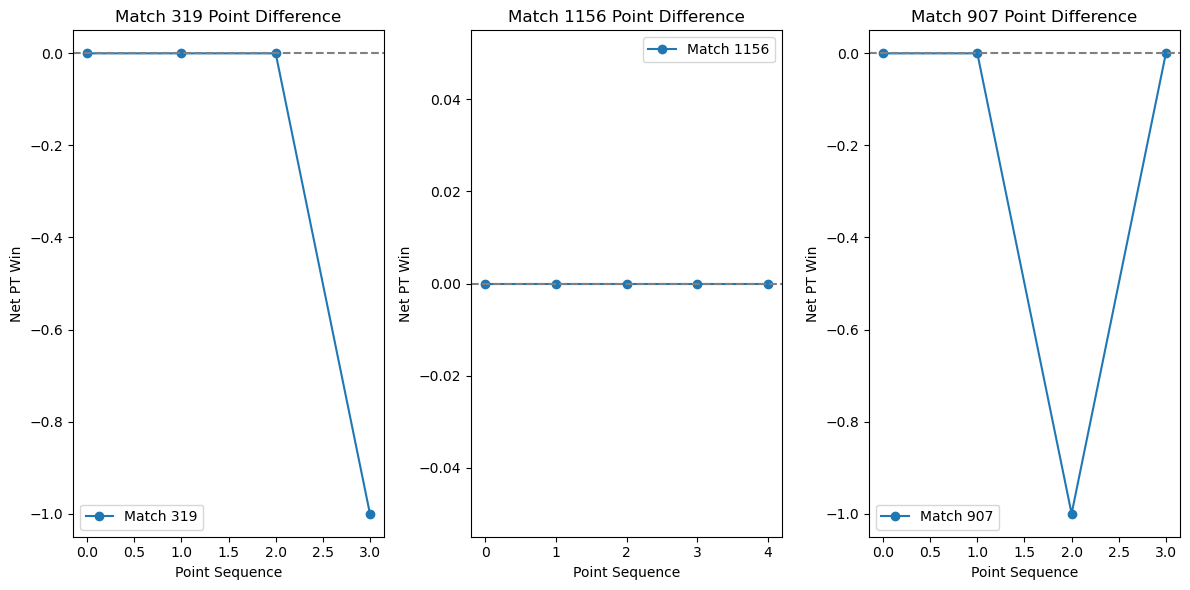

,points_won_list,ace_list,winner_list,time_diff_list,unf_err_list,break_pt_win_list,net_pt_won_list
0,-1,0,0,0.0,1,0,0
1,0,0,0,38.0,0,0,0
2,-1,0,0,23.0,1,0,0
3,0,0,1,30.0,0,0,0
4,1,1,1,50.0,0,0,0
...,...,...,...,...,...,...,...
7279,0,0,1,27.0,0,0,0
7280,1,0,1,45.0,0,0,1
7281,0,0,-1,37.0,0,0,0
7282,1,0,0,32.0,0,0,0


In [47]:
points_won_lists = select_variables(wimbledon, ['p1_net_pt_won','p2_net_pt_won'], 'net_pt_won_list', True)
print(points_won_lists[:5])
show_variables('Net PT Win', points_won_lists)
points_won_lists = [element for sublist in points_won_lists for element in sublist]
data['net_pt_won_list'] = points_won_lists
data

In [48]:
data['server'] = wimbledon['server']
data['server'] = data['server'].replace(2, -1)
data

,points_won_list,ace_list,winner_list,time_diff_list,unf_err_list,break_pt_win_list,net_pt_won_list,server
0,-1,0,0,0.0,1,0,0,1
1,0,0,0,38.0,0,0,0,1
2,-1,0,0,23.0,1,0,0,1
3,0,0,1,30.0,0,0,0,1
4,1,1,1,50.0,0,0,0,1
...,...,...,...,...,...,...,...,...
7279,0,0,1,27.0,0,0,0,1
7280,1,0,1,45.0,0,0,1,1
7281,0,0,-1,37.0,0,0,0,1
7282,1,0,0,32.0,0,0,0,1


In [49]:
data = data[(data <= 500).all(axis=1)]

In [50]:
data.loc[:, 'time_diff_list'] = data['time_diff_list'].cumsum()
data

C:\Users\28266\AppData\Local\Temp\ipykernel_41812\2725647786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'time_diff_list'] = data['time_diff_list'].cumsum()


,points_won_list,ace_list,winner_list,time_diff_list,unf_err_list,break_pt_win_list,net_pt_won_list,server
0,-1,0,0,0.0,1,0,0,1
1,0,0,0,38.0,0,0,0,1
2,-1,0,0,61.0,1,0,0,1
3,0,0,1,91.0,0,0,0,1
4,1,1,1,141.0,0,0,0,1
...,...,...,...,...,...,...,...,...
7279,0,0,1,305151.0,0,0,0,1
7280,1,0,1,305196.0,0,0,1,1
7281,0,0,-1,305233.0,0,0,0,1
7282,1,0,0,305265.0,0,0,0,1


In [51]:
data = (data - data.mean()) / data.std()
data

,points_won_list,ace_list,winner_list,time_diff_list,unf_err_list,break_pt_win_list,net_pt_won_list,server
0,-0.223987,-0.011833,-0.015474,-1.759523,1.971132,-0.021219,0.032106,1.021198
1,-0.119549,-0.011833,-0.015474,-1.759081,0.018796,-0.021219,0.032106,1.021198
2,-0.223987,-0.011833,-0.015474,-1.758814,1.971132,-0.021219,0.032106,1.021198
3,-0.119549,-0.011833,1.715475,-1.758466,0.018796,-0.021219,0.032106,1.021198
4,-0.015111,3.297295,1.715475,-1.757885,0.018796,-0.021219,0.032106,1.021198
...,...,...,...,...,...,...,...,...
7279,-0.119549,-0.011833,1.715475,1.785375,0.018796,-0.021219,0.032106,1.021198
7280,-0.015111,-0.011833,1.715475,1.785898,0.018796,-0.021219,2.515525,1.021198
7281,-0.119549,-0.011833,-1.746423,1.786328,0.018796,-0.021219,0.032106,1.021198
7282,-0.015111,-0.011833,-0.015474,1.786699,0.018796,-0.021219,0.032106,1.021198


In [52]:
def compute_dcor_matrix(df):
    n = df.shape[1]
    dcor_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            dcor_val = dcor.distance_correlation(df.iloc[:, i], df.iloc[:, j])
            dcor_matrix[i, j] = dcor_matrix[j, i] = dcor_val
    return dcor_matrix

In [53]:
dcor_matrix = compute_dcor_matrix(data)
dcor_matrix

array([[1.        , 0.03062631, 0.05961363, 0.16490556, 0.08691271,
        0.08315905, 0.03629093, 0.02530143],
       [0.03062631, 1.        , 0.49324186, 0.03188616, 0.1195901 ,
        0.03439984, 0.091936  , 0.2606358 ],
       [0.05961363, 0.49324186, 1.        , 0.02882269, 0.24242027,
        0.04980695, 0.33312955, 0.27723694],
       [0.16490556, 0.03188616, 0.02882269, 1.        , 0.02952266,
        0.01561448, 0.02382973, 0.02100997],
       [0.08691271, 0.1195901 , 0.24242027, 0.02952266, 1.        ,
        0.12397034, 0.14462655, 0.10010789],
       [0.08315905, 0.03439984, 0.04980695, 0.01561448, 0.12397034,
        1.        , 0.03450209, 0.13157106],
       [0.03629093, 0.091936  , 0.33312955, 0.02382973, 0.14462655,
        0.03450209, 1.        , 0.23556989],
       [0.02530143, 0.2606358 , 0.27723694, 0.02100997, 0.10010789,
        0.13157106, 0.23556989, 1.        ]])

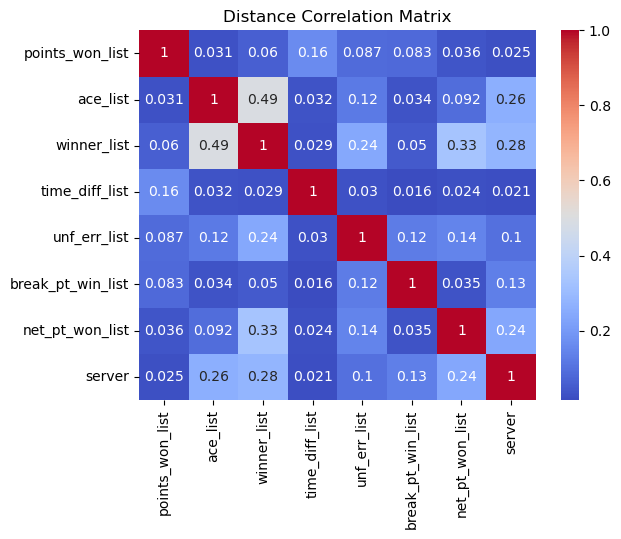

In [54]:
sns.heatmap(dcor_matrix, annot=True, cmap='coolwarm', xticklabels=data.columns, yticklabels=data.columns)
plt.title('Distance Correlation Matrix')
plt.show()

In [55]:
data.to_csv('wimbledon.csv', index=False)

In [56]:
complete_index = pd.DataFrame({'index': range(data.index[0], data.index[-1]+1)})
missing_indexes = set(complete_index['index']).difference(set(data.index))
missing_indexes

{391, 584, 756, 1347, 1479, 1569, 1685, 1851, 2330, 2349, 2410, 3985, 4381}